In [1]:
# stochastic implementation of stuffz

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw


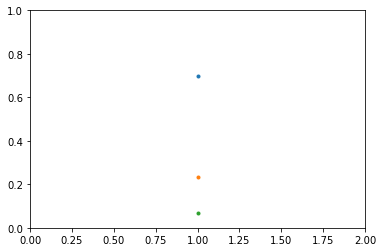

In [7]:
ts = 1
plt.plot(ts,Xh,'.')
plt.plot(ts,Xw,'.')
plt.plot(ts,Xc,'.')
plt.axis([0,2,0,1])
plt.show()

# using the model from
# https://arxiv.org/abs/astro-ph/0005081

In [41]:
tsnew = 2 # maybe this should be stochastic random variable. 
# see distribution of times between SF events in MUFASA

# perhaps generalise to  5 component gas model later

# define functional timescales - baryon cycling

# sweeping of warm gas into the cold component at a rate astar(Xw)
astar = 0.5 # usually 5e-8 /yr

# evaporation of cold clouds embedded in the hot gas 
# at a rate bstar(Xc)(Xh)^2
bstar = 0.1 # usually 1e-7 to 1e-8 /yr

# radiative cooling of the hot gas by mixing with the ambient warm gas
# at a rate cstar(Xw)(Xh)
cstar = 1  # usually 1e-6 to 1e-7 /yr
A = astar/cstar
B = bstar/cstar

dtau = cstar*(tsnew - ts)
dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
print(dXc, dXh)

0.11294999118747778 -0.1593962956023438


In [40]:
sfr = np.power(Xc,1.5)
print(sfr)

0.0176253200605


In [29]:
random_values = np.zeros((10000,))
for i in range(10000):
    random_values[i] = np.random.random()
    

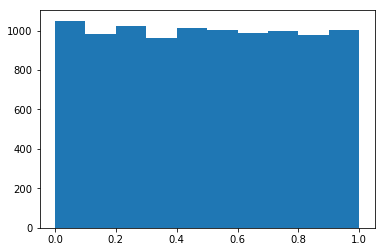

In [31]:
plt.hist(random_values,10)
plt.show()

# A few runs showing generated SFHs

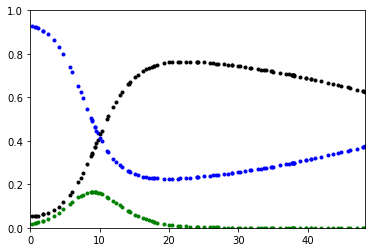

In [47]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in range(100):
    tstep = np.random.random()

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


initial conditions: Xh=0.5283815421594223 Xw=0.03492986182480673 Xc= 0.4366885960157709


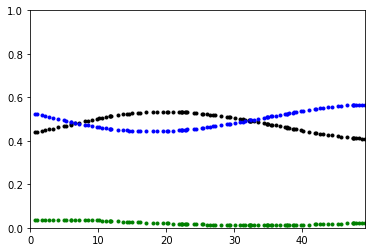

In [51]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in range(100):
    tstep = np.random.random()

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


# Make the timestep fixed

In [ ]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


# Extending the time range to larger ranges

  0%|          | 1/10000 [00:00<23:47,  7.00it/s]

initial conditions: Xh=0.7326648939543758 Xw=0.2133712438487868 Xc= 0.05396386219683735


100%|██████████| 10000/10000 [12:17<00:00,  7.03it/s]


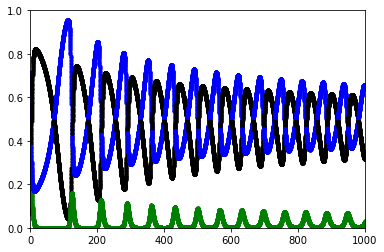

In [67]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(10000)):
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


# Changing parameter values

  0%|          | 2/1000 [00:00<00:50, 19.57it/s]

initial conditions: Xh=0.23116718785935486 Xw=0.3847407836180109 Xc= 0.38409202852263424


100%|██████████| 1000/1000 [00:13<00:00, 76.08it/s]


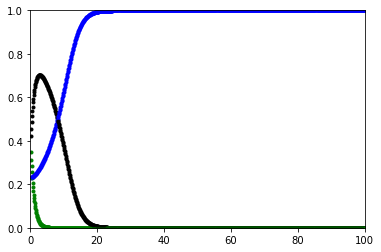

In [78]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 1 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 0.1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.axis([0,time,0,1])
plt.show()


  0%|          | 1/1000 [00:00<02:19,  7.17it/s]

initial conditions: Xh=0.8681293921437364 Xw=0.014858632092101086 Xc= 0.1170119757641625


100%|██████████| 1000/1000 [00:12<00:00, 77.38it/s]


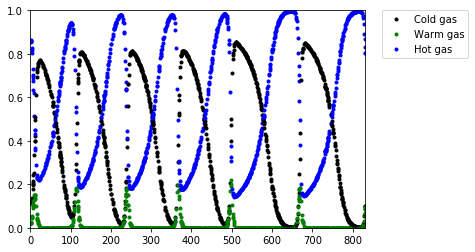

In [87]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+str(Xh)+' Xw='+str(Xw)+' Xc=',str(Xc))
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


# Add a stochastic component to the equations

  0%|          | 3/1000 [00:00<00:35, 28.05it/s]

initial conditions: Xh=0.242 Xw=0.161 Xc= 0.161


100%|██████████| 1000/1000 [00:13<00:00, 76.91it/s]


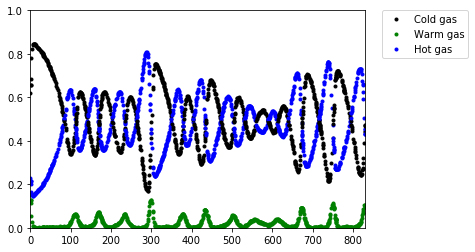

In [107]:
# gas is given by the equations

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)
time = 0.1

for numsteps in tqdm(range(1000)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 1e-3
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau + np.random.normal()*noisestrength
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau + np.random.normal()*noisestrength
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh
    if Xc < 0:
        Xc = -Xc
        Xh = Xh-Xc/2
        Xw = Xw-Xc/2
    if Xw < 0:
        Xw = -Xw
        Xc = Xc-Xw/2
        Xh = Xh-Xw/2
    if Xh < 0:
        Xh = -Xh
        Xc = Xc-Xh/2
        Xw = Xw-Xh/2
    #print('step conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


Populating the interactive namespace from numpy and matplotlib
initial conditions: Xh=0.965 Xw=0.011 Xc= 0.011
step conditions at time: 1.86: Xh=0.948 Xw=0.013 Xc= 0.038
step conditions at time: 1.86: Xh=0.943 Xw=0.026 Xc= 0.031
step conditions at time: 2.36: Xh=0.935 Xw=0.029 Xc= 0.036
step conditions at time: 3.65: Xh=0.910 Xw=0.024 Xc= 0.066
step conditions at time: 3.74: Xh=0.896 Xw=0.042 Xc= 0.061
step conditions at time: 3.85: Xh=0.913 Xw=0.015 Xc= 0.072
step conditions at time: 5.13: Xh=0.901 Xw=0.027 Xc= 0.072
step conditions at time: 5.19: Xh=0.919 Xw=0.006 Xc= 0.081
step conditions at time: 5.64: Xh=0.925 Xw=0.004 Xc= 0.071
step conditions at time: 5.80: Xh=0.934 Xw=0.006 Xc= 0.060
step conditions at time: 6.67: Xh=0.941 Xw=0.010 Xc= 0.059
step conditions at time: 6.85: Xh=0.946 Xw=0.015 Xc= 0.038
step conditions at time: 7.05: Xh=0.939 Xw=0.018 Xc= 0.042
step conditions at time: 7.22: Xh=0.942 Xw=0.011 Xc= 0.048
step conditions at time: 9.67: Xh=0.927 Xw=0.021 Xc= 0.052
step

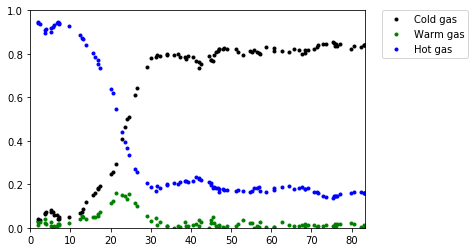

In [116]:
# gas is given by the equations
#%pylab notebook
%pylab inline

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)
time = 0.1

for numsteps in (range(100)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 1e-2
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau + np.random.normal()*noisestrength
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau + np.random.normal()*noisestrength
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh
    if Xc < 0:
        Xc = -Xc
        Xh = Xh-Xc/2
        Xw = Xw-Xc/2
    if Xw < 0:
        Xw = -Xw
        Xc = Xc-Xw/2
        Xh = Xh-Xw/2
    if Xh < 0:
        Xh = -Xh
        Xc = Xc-Xh/2
        Xw = Xw-Xh/2
    print('step conditions at time: '+'%.2f'%(time+tstep)+': Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


  0%|          | 2/1000 [00:00<00:51, 19.24it/s]

initial conditions: Xh=0.209 Xw=0.140 Xc= 0.140


100%|██████████| 1000/1000 [00:13<00:00, 76.39it/s]


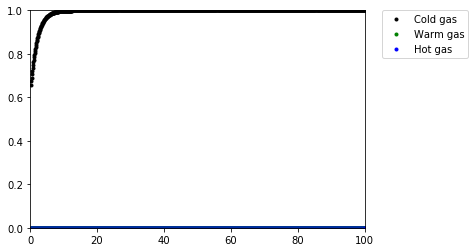

In [159]:
# gas is given by the equations
#%pylab notebook
#%pylab inline

# this piece of code has a bug, in that the condition
# if Xc > Xh and Xc > Xw:
#        Xc = Xc - stoceffect
#        Xh = stoceffect/2
#        Xw = stoceffect/2
# violates conservation of gas (not that that's necessary, but this might not be physical)

chainsize = 1000

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)

sfr = np.zeros((chainsize,))
timeindex = np.zeros((chainsize,))

time = 0.1

for numsteps in tqdm(range(chainsize)):
    #tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 1e-3
    stoceffect = np.absolute(np.random.normal())*noisestrength
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau 
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh
    if Xc > Xh and Xc > Xw:
        Xc = Xc - stoceffect
        Xh = stoceffect/2
        Xw = stoceffect/2
    #print('step conditions at time: '+'%.2f'%(time+tstep)+': Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)
    sfr[numsteps] = np.power(Xc,1.5)
    timeindex[numsteps] = time+tstep

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


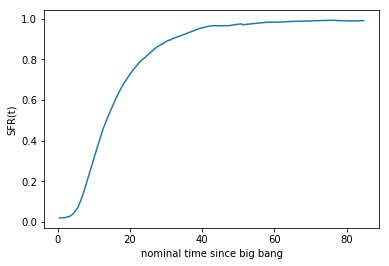

In [137]:
# astar = 0.1, bstar = 0.1, cstar = 1, noisestrength = 1e-3
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

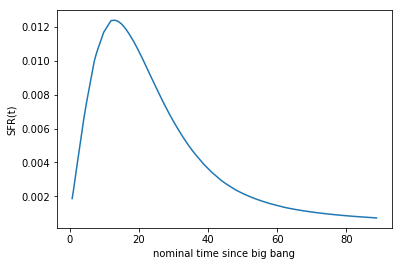

In [139]:
# astar = 1, bstar = 0.1, cstar = 1, noisestrength = 1e-3
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

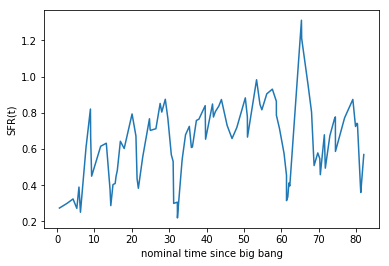

In [152]:
# astar = 0.1, bstar = 0.1, cstar = 1, noisestrength = 1e-1
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

  0%|          | 3/1000 [00:00<00:33, 29.80it/s]

initial conditions: Xh=0.222 Xw=0.034 Xc= 0.034


100%|██████████| 1000/1000 [00:12<00:00, 77.51it/s]


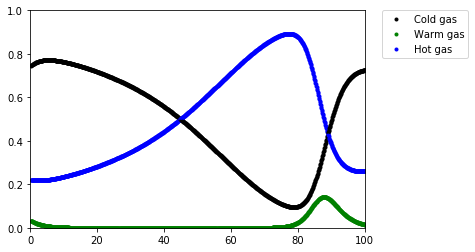

In [173]:
# gas is given by the equations
#%pylab notebook
#%pylab inline

# this piece of code has a bug, in that the condition
# if Xc > Xh and Xc > Xw:
#        Xc = Xc - stoceffect
#        Xh = stoceffect/2
#        Xw = stoceffect/2
# violates conservation of gas (not that that's necessary, but this might not be physical)

chainsize = 1000

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)

sfr = np.zeros((chainsize,))
timeindex = np.zeros((chainsize,))

time = 0.1

for numsteps in tqdm(range(chainsize)):
    #tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 0.1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 0
    stoceffect = np.absolute(np.random.normal())*noisestrength
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau 
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh
    # the way i'm implementing this is simply supernova explosions quenching SF
    if Xc > Xh and Xc > Xw:
        Xc = Xc - stoceffect
        Xh = Xh + stoceffect/2
        Xw = Xw + stoceffect/2
    #print('step conditions at time: '+'%.2f'%(time+tstep)+': Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)
    sfr[numsteps] = np.power(Xc,1.5)
    timeindex[numsteps] = time+tstep

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


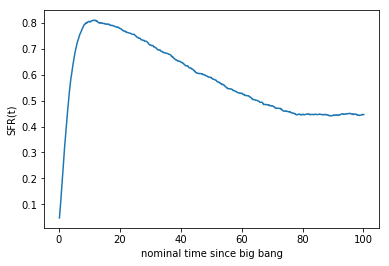

In [163]:
# astar = 0.5, bstar = 0.1, cstar = 1, noisestrength = 1e-3
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

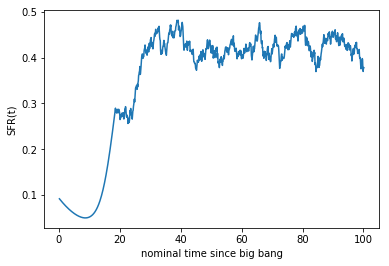

In [167]:
# astar = 0.5, bstar = 0.1, cstar = 1, noisestrength = 1e-2
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

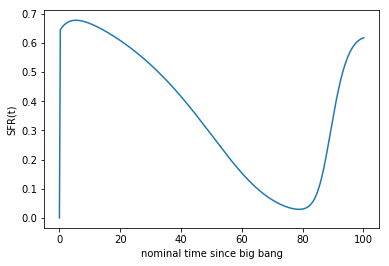

In [180]:
# astar = 0.5, bstar = 0.1, cstar = 1, noisestrength = 0
# as long as a>b, evaporation of cold gas in hot clouds is slower than sweeping of warm gas into cold clouds
# ie. SFR increases
timeindex[0] = 0
sfr[0] = 0
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

  0%|          | 2/1000 [00:00<00:50, 19.90it/s]

initial conditions: Xh=0.173 Xw=0.383 Xc= 0.383


100%|██████████| 1000/1000 [00:13<00:00, 72.80it/s]


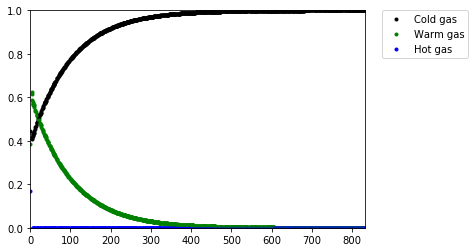

In [213]:
# gas is given by the equations
#%pylab notebook
#%pylab inline

# this piece of code has a bug, in that the condition
# if Xc > Xh and Xc > Xw:
#        Xc = Xc - stoceffect
#        Xh = stoceffect/2
#        Xw = stoceffect/2
# violates conservation of gas (not that that's necessary, but this might not be physical)

chainsize = 1000

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)

sfr = np.zeros((chainsize,))
timeindex = np.zeros((chainsize,))

time = 0.1

for numsteps in tqdm(range(chainsize)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)
    #tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.01 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 1 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    A = astar/cstar
    B = bstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 0
    stoceffect = np.absolute(np.random.normal())*noisestrength
    dtau = cstar*tstep
    dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau 
    dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = 1-Xc-Xh
    # the way i'm implementing this is simply supernova explosions quenching SF
    if Xc > Xh and Xc > Xw:
        Xc = Xc - stoceffect
        Xh = Xh + stoceffect/2
        Xw = Xw + stoceffect/2
    #print('step conditions at time: '+'%.2f'%(time+tstep)+': Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)
    sfr[numsteps] = np.power(Xc,1.5)
    timeindex[numsteps] = time+tstep

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


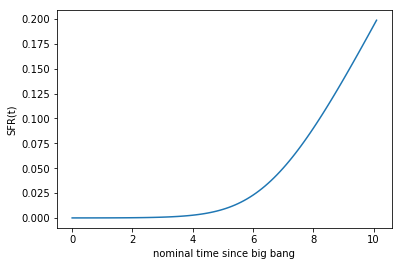

In [184]:
# astar = 0.5, bstar = 0.1, cstar = 1, noisestrength = 0
# as long as a>b, evaporation of cold gas in hot clouds is slower than sweeping of warm gas into cold clouds
# ie. SFR increases
timeindex[0] = 0
sfr[0] = 0
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

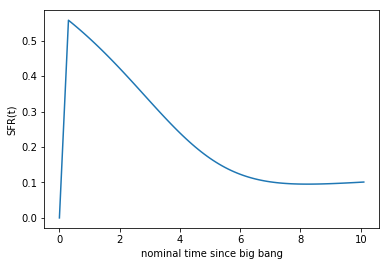

In [197]:
# astar = 0.01, bstar = 1, cstar = 1, noisestrength = 0
# as long as a>b, evaporation of cold gas in hot clouds is slower than sweeping of warm gas into cold clouds
# ie. SFR increases
timeindex[0] = 0
sfr[0] = 0
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

# Now trying the model from Debsarma et al (2016)
# https://arxiv.org/pdf/1608.00184.pdf

  0%|          | 3/1000 [00:00<00:34, 29.24it/s]

initial conditions: Xh=0.841 Xw=0.065 Xc= 0.065


100%|██████████| 1000/1000 [00:13<00:00, 73.76it/s]


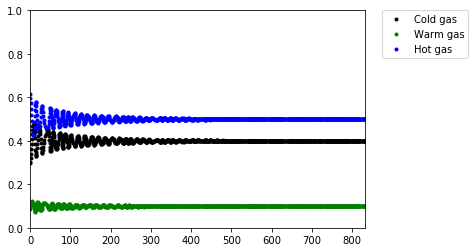

In [221]:
# gas is given by the equations
#%pylab notebook
#%pylab inline

# this piece of code has a bug, in that the condition
# if Xc > Xh and Xc > Xw:
#        Xc = Xc - stoceffect
#        Xh = stoceffect/2
#        Xw = stoceffect/2
# violates conservation of gas (not that that's necessary, but this might not be physical)

chainsize = 1000

Xh = np.random.random()
Xw = np.random.random()*(1-Xh)
Xc = 1-Xh-Xw
print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)

sfr = np.zeros((chainsize,))
timeindex = np.zeros((chainsize,))

time = 0.1

for numsteps in tqdm(range(chainsize)):
    tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)
    #tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.5 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 2.5 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    
    # additional: sweeping of hot gas into cold gas
    fstar = 0.4
    
    A = astar/cstar
    B = bstar/cstar
    F = fstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 0
    stoceffect = np.absolute(np.random.normal())*noisestrength
    dtau = cstar*tstep
    dXc = A*Xw - B*Xc*Xh*Xh + F*Xh
    dXw = -A*Xw + Xw*Xh
    dXh = B*Xc*Xh*Xh - Xw*Xh - F*Xh
    #dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau 
    #dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    #Xw = 1-Xc-Xh
    # the way i'm implementing this is simply supernova explosions quenching SF
    if Xc > Xh and Xc > Xw:
        Xc = Xc - stoceffect
        Xh = Xh + stoceffect/2
        Xw = Xw + stoceffect/2
    #print('step conditions at time: '+'%.2f'%(time+tstep)+': Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)
    sfr[numsteps] = np.power(Xc,1.5)
    timeindex[numsteps] = time+tstep

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


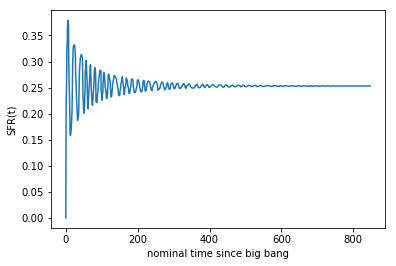

In [218]:
# A = 0.5, B = 2.5, F = 0.4, reproducing results from the paper
timeindex[0] = 0
sfr[0] = 0
plt.plot(timeindex,sfr)
plt.xlabel('nominal time since big bang')
plt.ylabel('SFR(t)')
plt.show()

  0%|          | 2/500 [00:00<00:25, 19.86it/s]

initial conditions: Xh=0.887 Xw=0.887 Xc= 0.887


100%|██████████| 500/500 [00:05<00:00, 95.11it/s] 


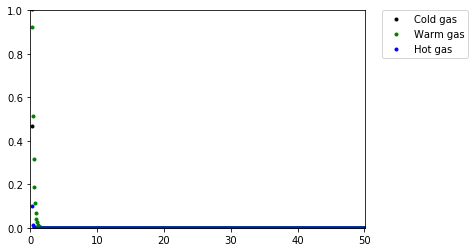

In [242]:
# gas is given by the equations
#%pylab notebook
#%pylab inline

# this piece of code has a bug, in that the condition
# if Xc > Xh and Xc > Xw:
#        Xc = Xc - stoceffect
#        Xh = stoceffect/2
#        Xw = stoceffect/2
# violates conservation of gas (not that that's necessary, but this might not be physical)

chainsize = 500

#Xh = np.random.random()
#Xw = np.random.random()*(1-Xh)
#Xc = 1-Xh-Xw

Xc = 0.113
Xh = 0.887
Xw = 1-Xc-Xw

print('initial conditions: Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xw)

sfr = np.zeros((chainsize,))
timeindex = np.zeros((chainsize,))

time = 0.1

for numsteps in tqdm(range(chainsize)):
    #tstep = np.absolute(np.random.normal(loc=0.3,scale = 1.0)*1)
    tstep = 0.1

    # sweeping of warm gas into the cold component at a rate astar(Xw)
    astar = 0.4 # usually 5e-8 /yr

    # evaporation of cold clouds embedded in the hot gas 
    # at a rate bstar(Xc)(Xh)^2
    bstar = 2.5 # usually 1e-7 to 1e-8 /yr

    # radiative cooling of the hot gas by mixing with the ambient warm gas
    # at a rate cstar(Xw)(Xh)
    cstar = 1  # usually 1e-6 to 1e-7 /yr
    
    # additional: sweeping of hot gas into cold gas
    fstar = 0.25
    
    A = astar/cstar
    B = bstar/cstar
    F = fstar/cstar

    #dtau = cstar*(tsnew - ts)
    noisestrength = 0
    stoceffect = np.absolute(np.random.normal())*noisestrength
    dtau = cstar*tstep
    dXc = A*Xw - B*Xc*Xh*Xh + F*Xh
    dXw = -A*Xw + Xw*Xh
    dXh = B*Xc*Xh*Xh - Xw*Xh - F*Xh
    #dXc = (-B*Xc*Xh*Xh + A*(1-Xc-Xh))*dtau 
    #dXh = (-Xh*(1-Xc-Xh) + B*Xc*Xh*Xh)*dtau
    #print(dXc, dXh)
    Xc = Xc + dXc
    Xh = Xh + dXh
    Xw = Xw + dXw
    #Xw = 1-Xc-Xh
    # the way i'm implementing this is simply supernova explosions quenching SF
    if Xc > Xh and Xc > Xw:
        Xc = Xc - stoceffect
        Xh = Xh + stoceffect/2
        Xw = Xw + stoceffect/2
    #print('step conditions at time: '+'%.2f'%(time+tstep)+': Xh='+'%.3f'%(Xh)+' Xw='+'%.3f'%Xw+' Xc=','%.3f'%Xc)
    sfr[numsteps] = np.power(Xc,1.5)
    timeindex[numsteps] = time+tstep

    time = time+tstep
    plt.plot(time,Xc,'k.')
    plt.plot(time,Xw,'g.')
    plt.plot(time,Xh,'b.')

plt.plot(time,Xc,'k.',label="Cold gas")
plt.plot(time,Xw,'g.',label="Warm gas")
plt.plot(time,Xh,'b.',label="Hot gas")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,time,0,1])
plt.show()


100%|██████████| 100/100 [00:00<00:00, 192664.40it/s]


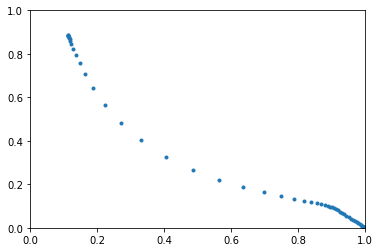

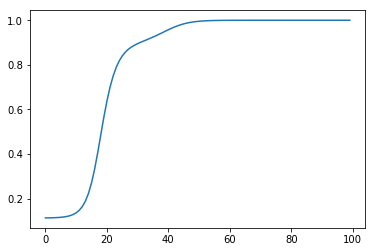

In [271]:
x = 0.113
y = 0.886
A = 0.4
B = 2.50
F = 0.25
cl = 100
xarr = np.zeros((cl,))
yarr = np.zeros((cl,))
for i in tqdm(range(cl)):
    dx = A*(1-x-y) -B*x*y*y + F*y
    dy = -y*(1-x-y) + B*x*y*y -F*y
    x = x+dx
    y = y+dy
    xarr[i] = x
    yarr[i] = y
    #print(x,y)
plt.plot(xarr,yarr,'.')
plt.axis([0,1,0,1])
plt.show()
plt.plot(np.arange(len(yarr)),xarr)
plt.show()
    

100%|██████████| 100/100 [00:00<00:00, 134389.75it/s]


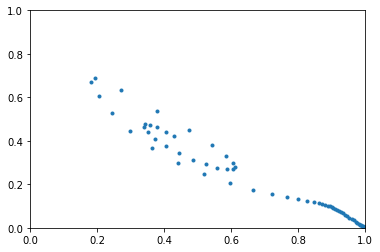

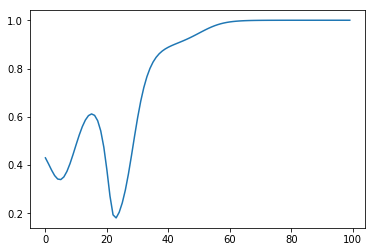

In [276]:
x = 0.45
y = 0.400
A = 0.4
B = 2.50
F = 0.25
cl = 100
xarr = np.zeros((cl,))
yarr = np.zeros((cl,))
for i in tqdm(range(cl)):
    dx = A*(1-x-y) -B*x*y*y + F*y
    dy = -y*(1-x-y) + B*x*y*y -F*y
    x = x+dx
    y = y+dy
    xarr[i] = x
    yarr[i] = y
    #print(x,y)
plt.plot(xarr,yarr,'.')
plt.axis([0,1,0,1])
plt.show()
plt.plot(np.arange(len(yarr)),xarr)
plt.show()
    

100%|██████████| 100/100 [00:00<00:00, 108492.08it/s]


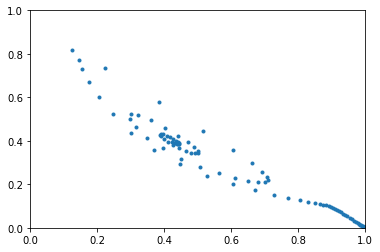

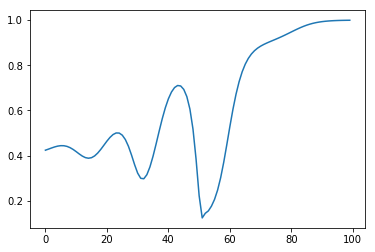

In [278]:
x = 0.42
y = 0.400
A = 0.4
B = 2.50
F = 0.25
cl = 100
xarr = np.zeros((cl,))
yarr = np.zeros((cl,))
for i in tqdm(range(cl)):
    dx = A*(1-x-y) -B*x*y*y + F*y
    dy = -y*(1-x-y) + B*x*y*y -F*y
    x = x+dx
    y = y+dy
    xarr[i] = x
    yarr[i] = y
    #print(x,y)
plt.plot(xarr,yarr,'.')
plt.axis([0,1,0,1])
plt.show()
plt.plot(np.arange(len(yarr)),xarr)
plt.show()
    

100%|██████████| 100/100 [00:00<00:00, 158875.15it/s]


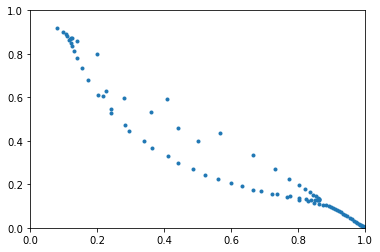

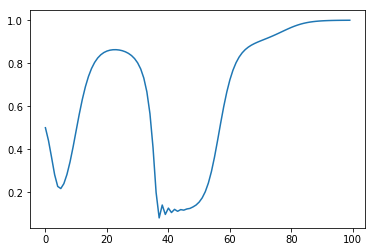

In [303]:
x = 0.5
y = 1-x-0.1
A = 0.4
B = 2.50
F = 0.25
cl = 100
xarr = np.zeros((cl,))
yarr = np.zeros((cl,))
for i in tqdm(range(cl)):
    dx = A*(1-x-y) -B*x*y*y + F*y
    dy = -y*(1-x-y) + B*x*y*y -F*y
    xarr[i] = x
    yarr[i] = y
    x = x+dx
    y = y+dy
    #print(x,y)
plt.plot(xarr,yarr,'.')
plt.axis([0,1,0,1])
plt.show()
plt.plot(np.arange(len(yarr)),xarr)
plt.show()
    

100%|██████████| 100/100 [00:00<00:00, 113605.20it/s]


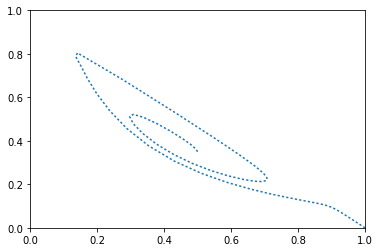

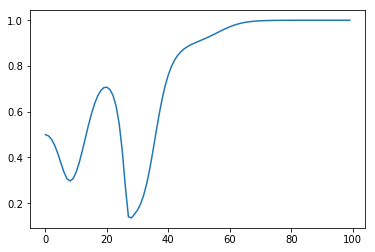

In [309]:
x = 0.5
y = 1-x-0.15
A = 0.4
B = 2.50
F = 0.25
cl = 100
xarr = np.zeros((cl,))
yarr = np.zeros((cl,))
for i in tqdm(range(cl)):
    dx = A*(1-x-y) -B*x*y*y + F*y
    dy = -y*(1-x-y) + B*x*y*y -F*y
    xarr[i] = x
    yarr[i] = y
    x = x+dx
    y = y+dy
    #print(x,y)
plt.plot(xarr,yarr,':')
plt.axis([0,1,0,1])
plt.show()
plt.plot(np.arange(len(yarr)),xarr)
plt.show()
    

100%|██████████| 10000/10000 [00:00<00:00, 291137.67it/s]


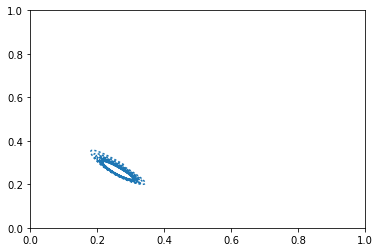

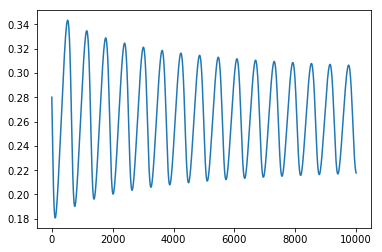

In [317]:
x = 0.28
y = 0.29
A = 0.26
B = 30
F = 1.547
cl = 10000
xarr = np.zeros((cl,))
yarr = np.zeros((cl,))
tstep = 0.01
for i in tqdm(range(cl)):
    dx = A*(1-x-y) -B*x*y*y + F*y
    dy = -y*(1-x-y) + B*x*y*y -F*y
    xarr[i] = x
    yarr[i] = y
    x = x+dx*tstep
    y = y+dy*tstep
    #print(x,y)
plt.plot(xarr,yarr,':')
plt.axis([0,1,0,1])
plt.show()
plt.plot(np.arange(len(yarr)),xarr)
plt.show()
    